In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import yfinance as yf


In [5]:
df=yf.download('GLD', '2008-01-01', '2021-1-20', auto_adjust=True)


[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,82.739998,82.830002,81.980003,82.459999,3815600
2008-01-02,83.559998,85.139999,83.440002,84.860001,12291100
2008-01-03,84.870003,85.940002,84.599998,85.570000,9553900
2008-01-04,85.339996,85.550003,84.430000,85.129997,8402200
2008-01-07,85.239998,85.260002,84.570000,84.769997,6944300


In [7]:
df = df[['Close']]
df=df.dropna()

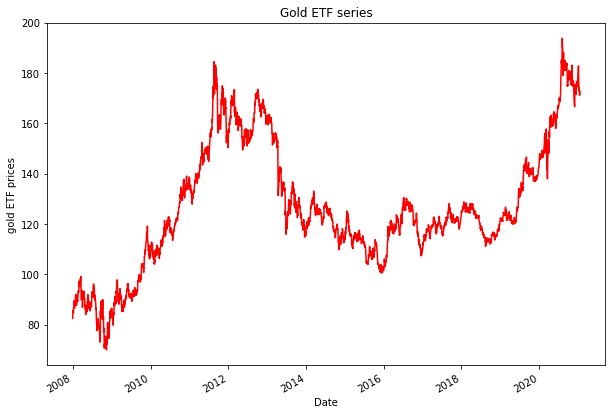

In [8]:
df.Close.plot(figsize=(10,7), color='r')
plt.ylabel("gold ETF prices")
plt.title("Gold ETF series")
plt.show()


In [9]:
df['day_3']=df['Close'].rolling(window=3).mean()
df['day_9']=df['Close'].rolling(window=9).mean()
df['next_day']=df['Close'].shift(-1)
df=df.dropna()
x= df[['day_3','day_9']]
y = df['next_day']

In [18]:
t = .8
t = int(t*len(df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

NameError: name 'X' is not defined

In [11]:
linear= LinearRegression().fit(x_train,y_train)
print('linear regression Model')
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))


linear regression Model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.44 (constant)


Text(0, 0.5, 'Gold ETF price')

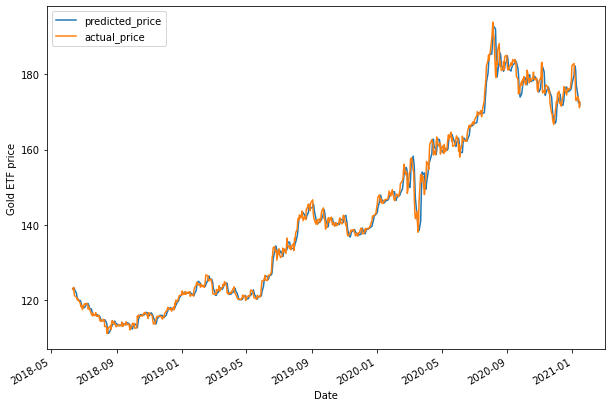

In [12]:
predicted_price= linear.predict(x_test)
predicted_price= pd.DataFrame(predicted_price, index= y_test.index, columns=['price'])
predicted_price.plot(figsize=(10,7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel('Gold ETF price')


In [13]:
predicted_price.head()

,price
Date,
2018-06-11,123.075241
2018-06-12,123.071800
2018-06-13,123.141898
2018-06-14,123.181648
2018-06-15,122.611927


<AxesSubplot:xlabel='Date'>

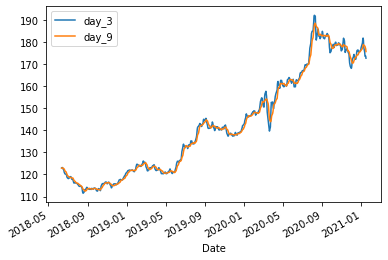

In [14]:
x_test.plot()

In [15]:
r2_score=linear.score(x[t:],y[t:])*100
float("{0:.2f}".format(r2_score))


99.32

# Cumulative returns

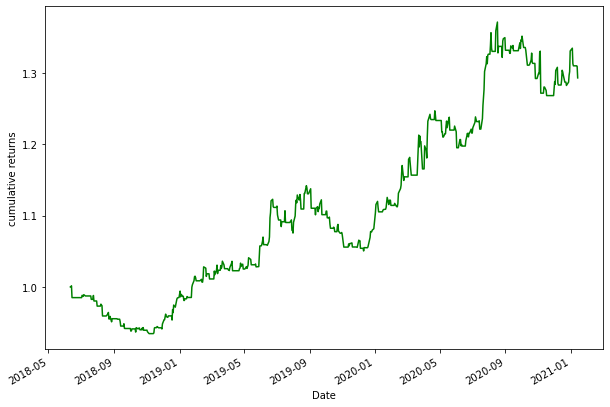

,price,Next_dprice,Actual_price,Gold_returns,signal,stretegy_return
Date,,,,,,
2021-01-07,179.479996,180.973368,173.339996,-0.034210,0,-0.000000
2021-01-08,173.339996,177.221888,173.000000,-0.001961,0,-0.000000
2021-01-11,173.000000,174.517860,174.119995,0.006474,0,0.000000
2021-01-12,174.119995,172.420196,173.369995,-0.004307,0,-0.000000
2021-01-13,173.369995,172.531373,173.279999,-0.000519,1,-0.000519
2021-01-14,173.279999,172.759945,171.130005,-0.012408,1,-0.012408
2021-01-15,171.130005,171.817776,172.580002,NaN,0,NaN


In [16]:
gold=pd.DataFrame()
gold['price']=df[t:]['Close']
gold['Next_dprice']=predicted_price
gold['Actual_price']=y_test
gold['Gold_returns']=gold['price'].pct_change().shift(-1)
gold['signal']=np.where(gold.Next_dprice.shift(1)<gold.Next_dprice,1,0)
gold['stretegy_return']=gold['signal']*gold['Gold_returns']
((gold['stretegy_return']+1).cumprod()).plot(figsize=(10,7), color='g')
plt.ylabel('cumulative returns')
plt.show()
gold.tail(7)

# Check whether we should buy Gold or not on the basis of Predicted Price


In [17]:

data = yf.download('GLD', '2008-01-01', '2020-12-30', auto_adjust=True)
data['day_3'] = data['Close'].rolling(window=3).mean()
data['day_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()
data['Next'] = linear.predict(data[['day_3', 'day_9']])
data['signal'] = np.where(data.Next.shift(1) < data.Next,"Buy","No Position")
data.tail(7)

[*********************100%***********************]  1 of 1 completed


<ipython-input-17-a431f92944e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Next'] = linear.predict(data[['day_3', 'day_9']])
<ipython-input-17-a431f92944e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'] = np.where(data.Next.shift(1) < data.Next,"Buy","No Position")


,Open,High,Low,Close,Volume,day_3,day_9,Next,signal
Date,,,,,,,,,
2020-12-18,176.649994,176.979996,176.100006,176.440002,6789900,176.026667,174.024445,176.273626,Buy
2020-12-21,176.289993,176.940002,175.759995,175.880005,8168900,176.353338,174.066667,176.657793,Buy
2020-12-22,176.199997,176.339996,174.339996,174.490005,9442400,175.603338,174.287779,175.710240,No Position
2020-12-23,175.100006,176.210007,175.059998,175.649994,6542800,175.340001,174.674445,175.313852,No Position
2020-12-24,175.550003,176.369995,175.509995,176.350006,3695400,175.496668,175.103334,175.413879,Buy
2020-12-28,177.259995,177.910004,175.630005,175.710007,7778700,175.903336,175.566669,175.807467,Buy
2020-12-29,176.250000,176.970001,175.570007,176.350006,5983700,176.136673,175.834447,176.032904,Buy
